# Interpreting Coefficients 

## Lesson Objectives

By the end of this lesson, students will be able to:
- Retrieve the coefficients from the model and visualize
- Explain what the coefficients represent to a non-technical stakeholder. 
- Produce visualizations for stakeholders using their coefficients & insights

### What the Coefficients Tell us

Now that we have learned how to properly diagnose a Linear Regression model and can confirm that our model meets the assumptions, we can extract insight from the coefficients that our model determines for each feature. 


The coefficients of a linear regression model are the numbers by which each feature is multiplied in order to predict a dependent target variable.


Simple linear regression models are defined as the slope of a line.  


<!-- $$\large y = mx + b$$ -->

![png](../../Images/eqn_y_mx_b.png)

where:
- x is an independent variable or feature,

- y is a dependent variable or target,

- m is the coefficient/slope of x

- b is some intercept term that represents the value of y when x = 0.
    - You may also have seen b referred to as c for constant.




- Multiple linear regression simply adds more x’s and m’s, one for each feature.
    - Once we have more than 1 m, we switch to using the greek letter beta (β) with a subscript number to indicate which column it is associated with. 
    - $\beta_1 $ is the coefficient for the first X column ($X_1$)
   - We refer to the constant, which doesn't have a corresponding feature, as $\beta_0$.


<!-- 
$$ \large y=\beta_1 X_1 + \beta_2 X_2 +... \beta_nX_n + b $$ -->

![png](../../Images/eqn_y_betas.png)

where:
- n = the number of independent variables.

In this lesson we will walk through extracting the coefficients from our OLS model, visualizing them, and interpret their meaning, and use them to provide insights for a stakeholder.

## Imports and Loading the Model 

In [33]:
## Standard Statsmodels import
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

In [34]:
## The original dataset
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTiitWN7DnJMRDcRvMKL3_xu5Y0fl2u5J2vWOrJOcOy95ZiBulg5HqMftWWeiYFYYNHMuVPDWT_vxVc/pub?output=csv")
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1100000,2,1.75,2050,11900,1.00,0,2050,0,1950,0,98004
1,430000,3,1.50,1690,9708,1.50,0,1690,0,1954,0,98006
2,2150000,3,2.75,3470,9610,3.00,1,3470,0,1989,2000,98034


### Function and Data From Previous Lesson

In [35]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    
    """
    ## Make predictions and calculate residuals
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid, line='45',fit=True,ax=axes[0]);
    
    ## Homoscedascity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

### Loading the Data and Model From Last Lesson with Joblib

- We are now going to load in all of the X and y variables, model, and preprocessing tools from the prior lesson by loading in our joblib file.
- To remind you: we had saved all of those variables in a dictionary and then saved the dictionary as a joblib file. 

In [36]:
import joblib
loaded_data = joblib.load("ols_results.joblib")
loaded_data.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'Outlier Scaler', 'Column Transformer', 'OLS Results'])

- We can now assign new variable names to the values in our dictionary to work with the data just like we have previously. 

In [37]:
## Saving the dictionary data into separate variables
X_train_df = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test_df  = loaded_data['X_test']
y_test = loaded_data['y_test']

##  Saving the model and processing tools to new vars
result = loaded_data['OLS Results']
outlier_scaler = loaded_data['Outlier Scaler']
preprocessor = loaded_data['Column Transformer']

- If everything was saved fully-intact, we should be able to display the result.summary() and also run our evaluation function.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:09:16   Log-Likelihood:                -48210.
No. Observations:                3687   AIC:                         9.657e+04
Df Residuals:                    3610   BIC:                         9.705e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.972e+04   2814.752     -7.007

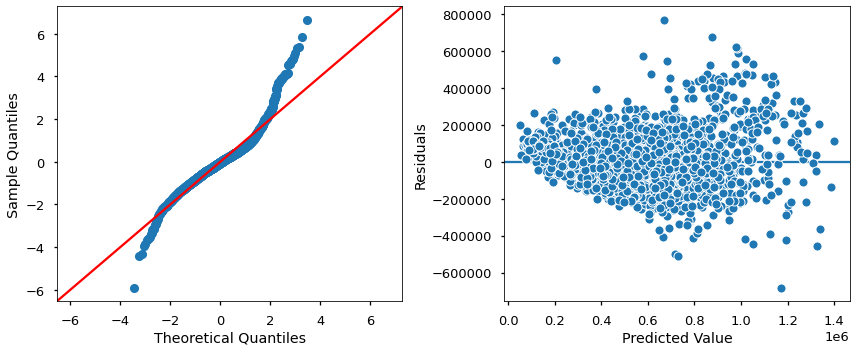

In [38]:
print(result.summary())
evaluate_ols(result,X_train_df, y_train)

# Interpreting Coefficients

## Getting the Coefficients from the Model

In order to more easily interpret and visualize the coefficients that our model determined, we will want to extract them from the model as pandas Series. Thankfully, Statsmodels makes this very easy!

- For statsmodel's OLS, we can access the coefficients from the `result` variable's `.params` attribute.
    - It is already a pandas Series and already has the feature names as the index.

In [39]:
## Getting statsmodels coefficients
coeffs = result.params
coeffs

bedrooms         -19,723.36
bathrooms         28,172.33
sqft_living          207.23
floors           -41,138.40
waterfront       418,376.34
                    ...    
zipcode_98178   -158,056.04
zipcode_98188   -185,179.20
zipcode_98198   -190,653.81
zipcode_98199    221,153.93
const            177,606.75
Length: 78, dtype: float64

### Splitting the Coefficients When There's too many to visualize

- Our one-hot-encoded zipcodes created a very large number of features. 
    - To facilitate analyzing and visualizing the coefficients, we can separate them out so that all of the zipcode coefficients are grouped together in a separate Series.
    
- Advanced Tip:
    - The .index and .columns of DataFrame/Series are ALSO Series. 
        - This means we can use our .str. methods to filter our coefficients by name. 

In [40]:
## Getting the True/False for which are zipcode cols
zip_cols = coeffs.index.str.contains('zipcode')
zip_cols

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [41]:
## slicing out the zicode coefficents to a separate series
coeffs_zips = coeffs.loc[zip_cols].copy()
coeffs_zips

zipcode_98001   -203,278.84
zipcode_98002   -204,908.62
zipcode_98003   -200,571.99
zipcode_98004    457,266.88
zipcode_98005    176,257.23
                    ...    
zipcode_98177     66,476.39
zipcode_98178   -158,056.04
zipcode_98188   -185,179.20
zipcode_98198   -190,653.81
zipcode_98199    221,153.93
Length: 70, dtype: float64

In [42]:
## slicing out the zicode coefficents to a separate series
coeffs_main = coeffs.loc[~zip_cols].copy()
coeffs_main

bedrooms        -19,723.36
bathrooms        28,172.33
sqft_living         207.23
floors          -41,138.40
waterfront      418,376.34
sqft_basement       -73.78
yr_renovated         24.84
const           177,606.75
dtype: float64

### Making it Easier to Read Large Coefficients in Pandas

- Since we have very large, monetary values, it can be helpful to change how Panda's displays floats to better match our needs.  
    - In this case, we are the very least want to add a `,` to separate thousands, but it would be nice to also round to only 2 decimal places. 

#### Finding the Solution:

- If you had googled "separate thousands with commas pandas" you would have found the [this page on stack overflow](https://stackoverflow.com/questions/43102734/format-a-number-with-commas-to-separate-thousands-in-python), which suggests using the following to add the commas separators:
   ```python
   pd.options.display.float_format = '{:,}'.format
   ```
- Based on what we have learned about string formatting, we also know that .2f is the code for rounding to 2 decimal places. 
    - If we combine the two format codes, we can do both at once!
- So our final format code is: `'{:,.2f}'`.


In [43]:
## Setting the Pandas Float Format for easier coeficient reading.
pd.options.display.float_format = '{:,.2f}'.format

In [44]:
## show the coeffs series again with new format
coeffs_main

bedrooms        -19,723.36
bathrooms        28,172.33
sqft_living         207.23
floors          -41,138.40
waterfront      418,376.34
sqft_basement       -73.78
yr_renovated         24.84
const           177,606.75
dtype: float64

- Much easier to read!

## Interpreting Our Models' Coefficients

- Each coefficient tells us: "when this feature is increased by a value of 1, the target will change by this much".

- Let's take a look at the non-zipcode coeffs, and let's sort them by values so we can see the factor that positively influence price grouped together, as well as the ones that negatively influence price.

In [45]:
## Sorting the coefficients largest to smallest
coeffs_main = coeffs_main.sort_values(ascending=False)
coeffs_main

waterfront      418,376.34
const           177,606.75
bathrooms        28,172.33
sqft_living         207.23
yr_renovated         24.84
sqft_basement       -73.78
bedrooms        -19,723.36
floors          -41,138.40
dtype: float64

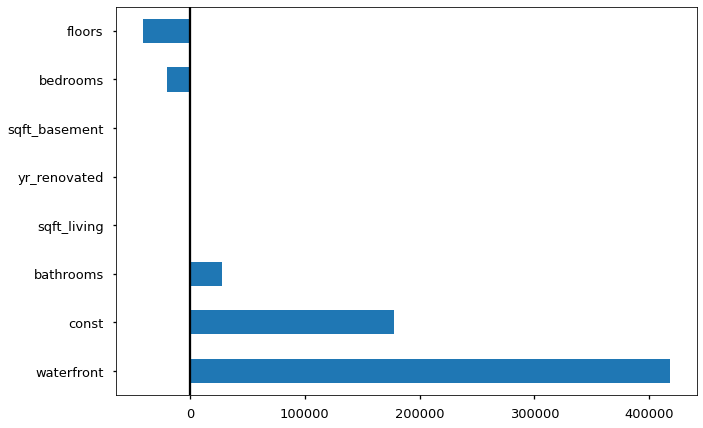

In [46]:
# We can also visualize our coeffiicents, as long as we do not include too many
coeffs_main.plot(kind='barh')
plt.axvline(0,color='k');

#### Features that Increase a Home's Value (have a + coefficient)
- For the waterfront feature:
    - We can see that having waterfront property will add \$418,376.34 to our home's sale price!
    - Considering what we may know about real estate value, this is a large but plausible value.
    
    
    
- Let's skip over the "const" for just a moment.



- For the bathrooms feature:
    - We can see that increase the number of bathrooms by 1 will add $28,172.33 to the home's value.



- For sqft_living:
    - Each additional sqft of living space will increase the home's value by $207.23
    
    
- For yr_renovated: 
    - Each additional year added to the year it was renovated adds $24.84 to the home's value.
        - This means that the more recently it has been renovated, the higher the price (but not by very much).

#### Features that decrease a Home's Value (have a - coefficient)

- For sqft_basement:
    - Each additional sqft subtracts $73.78 from the price.
    
- For bedrooms:
    - Each bedroom added  subtracts $19,723.36 from the price.
    
- For floors:
    - Each additional floor subtracts $41,138.40 from the homes price. 
    

#### "But, wait a minute..."

> You may be thinking "How in the world could adding bedrooms or floors decrease a home's value? Something seems fishy..."
- You may be right! Let's visualize these features and then revisit the question

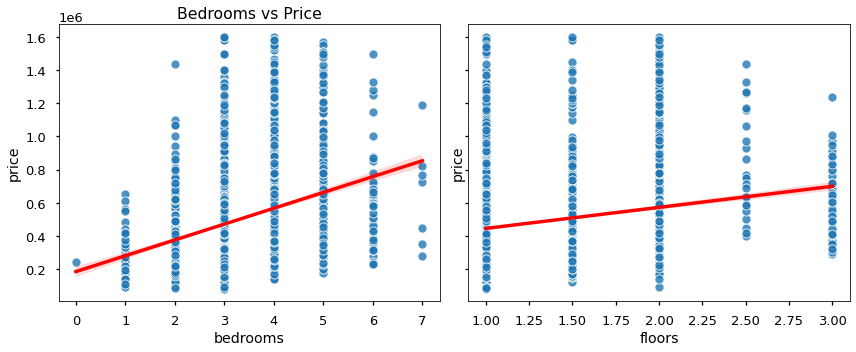

In [47]:
## visualizing variables with large negative ceoffs

fig, axes = plt.subplots(ncols=2, figsize=(12,5),
                         sharey=True)

sns.regplot(x=X_train_df['bedrooms'], y=y_train,
            scatter_kws={'ec':'white','lw':1},
            line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Bedrooms vs Price')

sns.regplot(x=X_train_df['floors'], y=y_train,
            scatter_kws={'ec':'white','lw':1},
            line_kws={'color':'red'}, ax=axes[1])


plt.tight_layout()

>OK, so it looks like bedrooms has a positive relationship with price (mostly). 

- ***So why does the model calculate a negative coefficient for bedrooms?***
    - Let's answer that by doubling back to discuss the coefficient we skipped: the constant!

#### The Constant as a Baseline

Let's revisit the meaning of the constant/intercept that our model determined. 

- In a simple regression, the y-intercept is the value where the regression line cross the y-axis. In other words, it is the value when X=0.

- So we can think of our constant as the baseline value of a home BEFORE we add in the effects of all of the other features. 

    - Depending on the features included, our model could have determined a negative intercept would have been a better fit!
    

In [48]:
coeffs_main

waterfront      418,376.34
const           177,606.75
bathrooms        28,172.33
sqft_living         207.23
yr_renovated         24.84
sqft_basement       -73.78
bedrooms        -19,723.36
floors          -41,138.40
dtype: float64

- So, keeping this understanding of the constant in mind, let's examine our value and how that relates back the price.

- Our model used a constant of \$177,606 as the baseline price (before factoring in the actual features). Now, if we only had these main coefficient in our model, our results would seem kind of strange. 
    - But we have a second series full of additional coefficients that we set aside earlier.

#### So whats the effect of zipcodes?

In [49]:
## formatting our axis to match our dataframe floats
from matplotlib.ticker import StrMethodFormatter

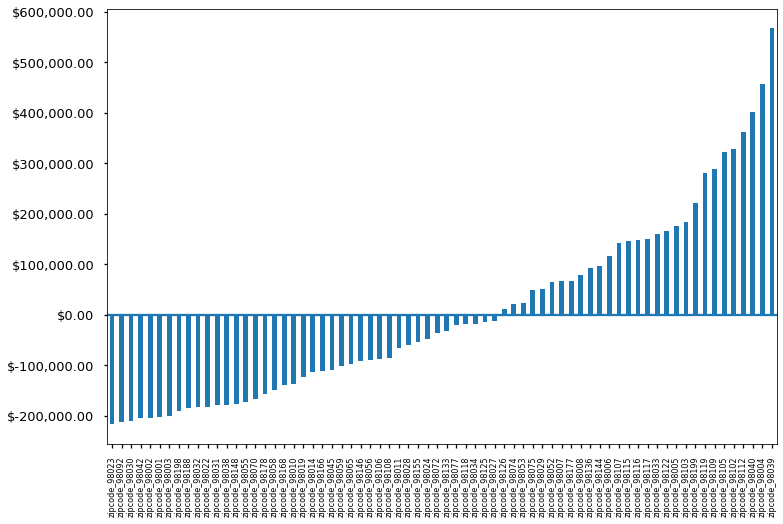

In [50]:
ax = coeffs_zips.sort_values().plot(kind='bar',figsize=(12,8))
ax.axhline()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.2f}'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=8);

- We can see that some zipcodes add over $500,000 to the home's price! 
    - Keeping these zipcode coefficients in mind, our effect of bedrooms doesn't seem quite as crazy. 

## What if we hadn't used zipcode?

In [51]:
X_train_no_zips = X_train_df.loc[:,~zip_cols]
X_test_no_zips = X_test_df.loc[:,~zip_cols]
display(X_train_no_zips.head(2),
       X_test_no_zips.head(2))

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,const
1344,3.00,1.75,"1,850.00",1.00,0.00,0.00,0.00,1.00
1282,3.00,2.25,"1,870.00",1.00,0.00,430.00,0.00,1.00


,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,const
2041,3.00,2.50,"1,520.00",1.00,0.00,440.00,0.00,1.00
2607,3.00,2.25,"1,490.00",2.00,0.00,450.00,0.00,1.00


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     438.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:09:18   Log-Likelihood:                -50037.
No. Observations:                3687   AIC:                         1.001e+05
Df Residuals:                    3679   BIC:                         1.001e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.776e+04   4479.432     -6.198

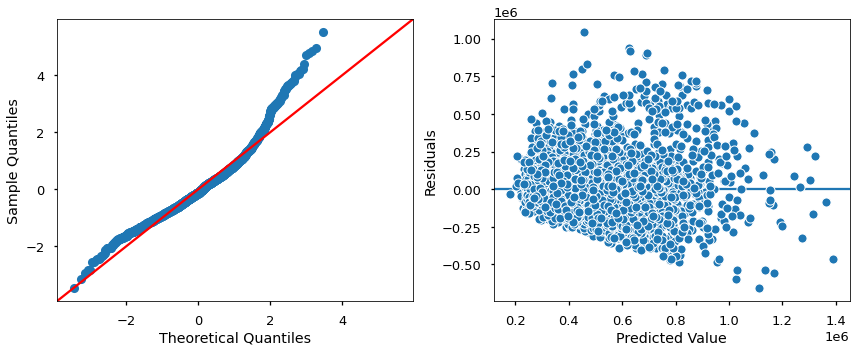

In [52]:
## FItting a model without zipcodes 
model = sm.OLS(y_train,X_train_no_zips)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_no_zips, y_train)

- As we can see, we can only explain 42% of the variability in price now that we have excluded information about zipcode/location. Which is much less than our .79. 
    - This makes sense because as the saying go, when it comes to real estate its "Location. Location. Location."
    
- We can see that the p-value for bathrooms has changed and it should no longer be included in the model. We normally would make a new final model with the feature removed. 

In [21]:
## getting our coeffiicents without zipcodes
coeffs = result.params.sort_values()
coeffs

bedrooms        -27,763.58
sqft_basement        35.06
yr_renovated         50.15
sqft_living         200.60
bathrooms         8,776.10
floors           28,477.84
const           115,927.49
waterfront      292,953.34
dtype: float64

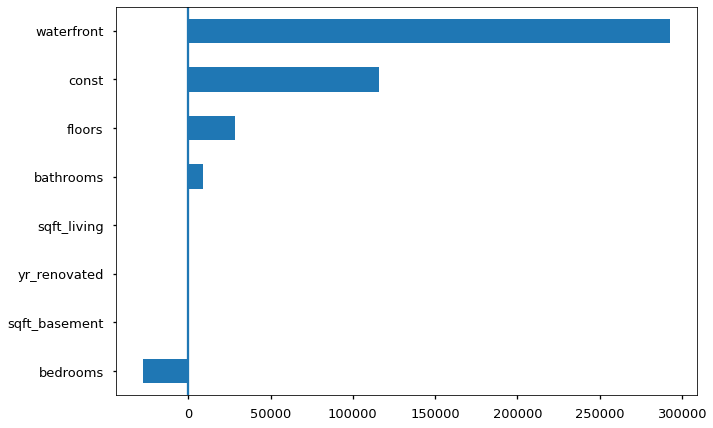

In [22]:
ax = coeffs.plot(kind='barh')
ax.axvline(0)

When excluding zipcodes, the values for some of our coefficients have changed, but bedrooms still has a negative impact on price.


**It is very important to keep in mind that all of coefficients are being used *together* and not in a vacuum (including your constant).**

- Even though some of the values of our coefficients seem a bit odd when considered in a vacuum. We can still use these coefficients to drive recommendations for stakeholders. 

# Summarizing Important Features for Home Price for a Stakeholder

- Assuming that our stakeholder wants to know how to increase the value of a home, we can visualize the features that have positive coefficients to show things the stakeholder could to to their home to increase its value.


- For the stakeholder-facing visualizations, it is acceptable to return to the original dataframe  before preprocessing for the model. 
    - However, you will want to exclude any values that were removed by outlier removal.

In [23]:
## so what was were max house price included in our model training data?
y_train.min(), y_train.max()

(82000, 1600000)

In [24]:
## what is the min and max of our full data?
df['price'].min(), df['price'].max()

(80000, 7700000)

In [25]:
## saving a new dataframe for visualizations that exludes values not in the model
plot_df = df.loc[ (df['price'] > y_train.min())  &  (df['price'] < y_train.max())]
plot_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1100000,2,1.75,2050,11900,1.00,0,2050,0,1950,0,98004
1,430000,3,1.50,1690,9708,1.50,0,1690,0,1954,0,98006
3,336000,4,2.50,2530,8169,2.00,0,2530,0,1993,0,98003
4,649500,3,3.00,3730,383328,1.50,0,2230,1500,1990,0,98038
5,450000,3,1.75,1400,13775,1.00,0,1400,0,1963,0,98028


## Selecting the Best Explanatory Visualizations

- It is acceptable to experiment with different visuals that would help best express your point. 
    - For floors and waterfront, barplots may be more helpful than regression plots. 

### Floors

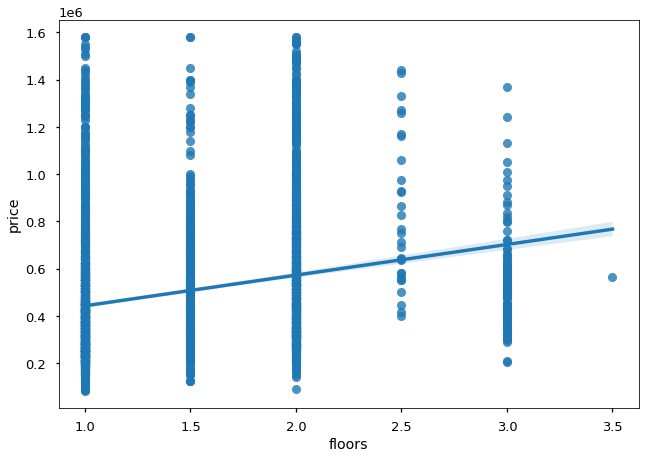

In [26]:
## trying regplot for floors
sns.regplot(data=plot_df, x='floors',y='price');

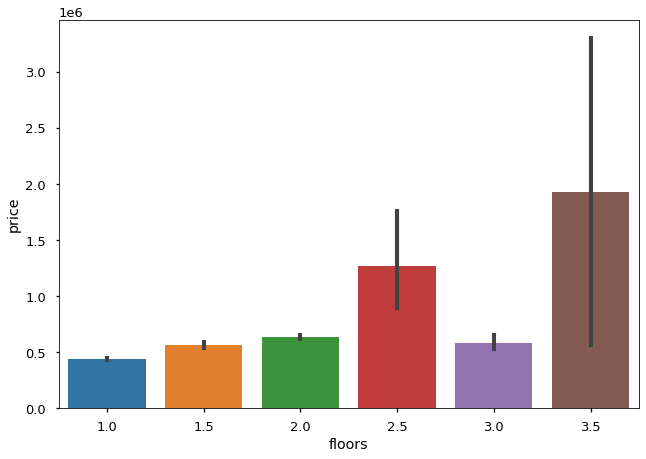

In [27]:
## trying barplot for floors
sns.barplot(data=df, x='floors',y='price');

- The barplot for floors makes it easier to see the positive relationship between floors and price.

### Bathrooms

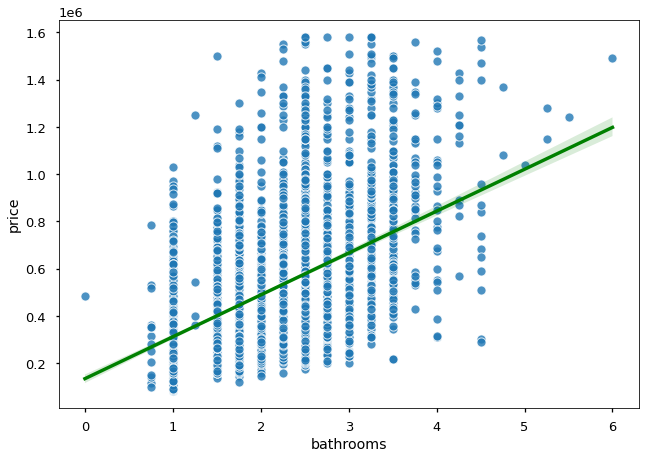

In [28]:
sns.regplot(data=plot_df, x='bathrooms',y='price',
            scatter_kws={'ec':'white','lw':1}, 
            line_kws={'color':'green'})

### Waterfront

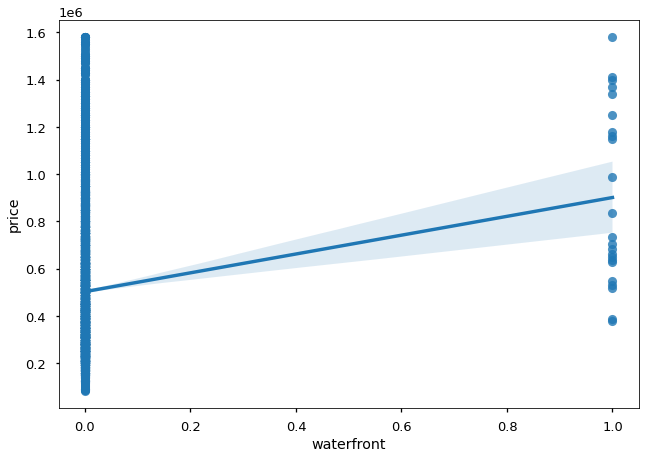

In [29]:
sns.regplot(data=plot_df, x='waterfront',y='price')

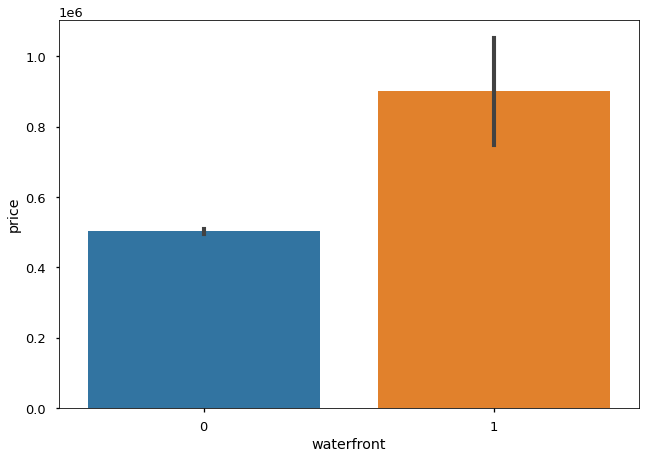

In [30]:
sns.barplot(data=plot_df, x='waterfront',y='price')

### sqft_living

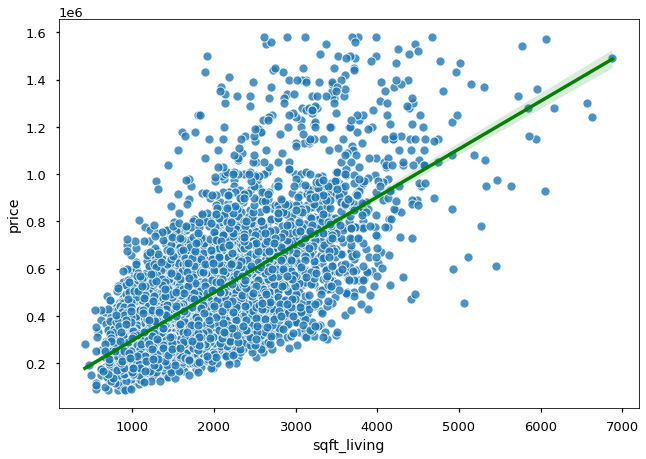

In [31]:
ax = sns.regplot(data=plot_df, x='sqft_living',y='price',
                 scatter_kws={'ec':'white','lw':1}, 
                line_kws={'color':'green'})

## Stakeholder Summary

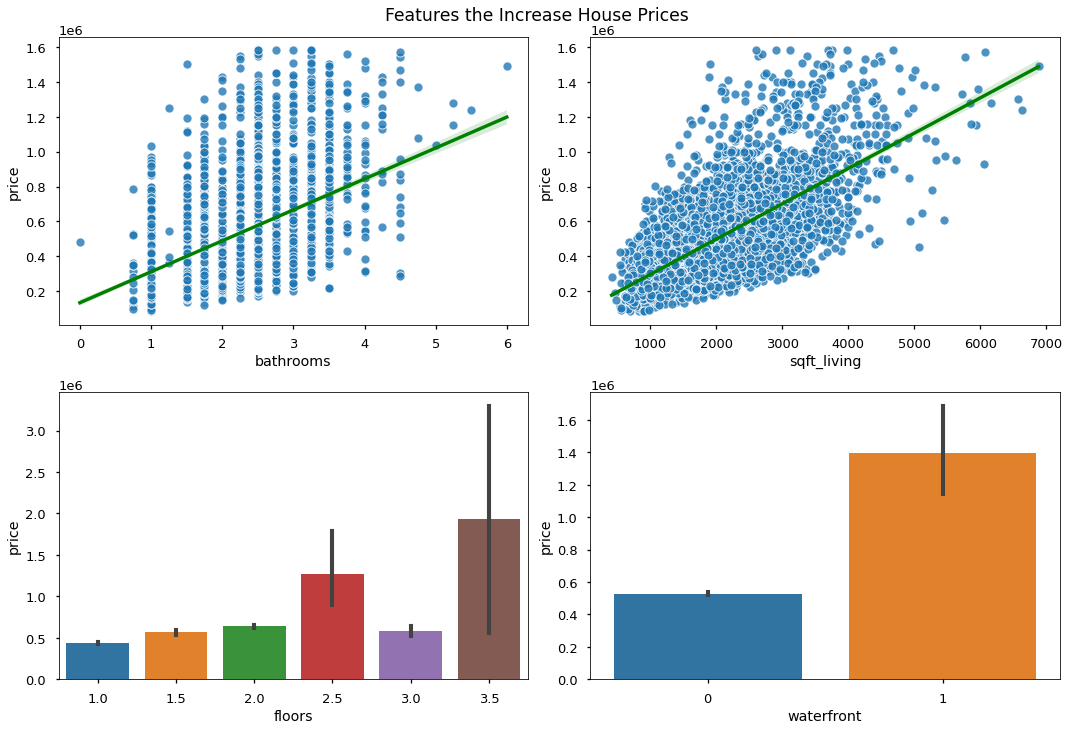

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

fig.suptitle('Features the Increase House Prices',y=1.01, fontsize='xx-large')

sns.regplot(data=plot_df, x='bathrooms',y='price',
            scatter_kws={'ec':'white','lw':1}, 
            line_kws={'color':'green'}, ax=axes[0,0])


sns.regplot(data=plot_df, x='sqft_living',y='price',
                 scatter_kws={'ec':'white','lw':1}, 
                line_kws={'color':'green'}, ax=axes[0,1])

sns.barplot(data=df, x='floors',y='price',ax=axes[1,0])

sns.barplot(data=df, x='waterfront',y='price',ax=axes[1,1])

plt.tight_layout();

- Based on our regression model, we were able to explain 42% of the variance in home price using a handful of features. 
- Our model was designed for homes that were > \$82,000 in value and less than \$1,600,000.

- According to our model,to increase a home's value you should:
    - Increase the number of floors
    - Increase the sqft of the living area 
    - Add bathrooms 
- While beyond the stakeholders control, known that being waterfront property significantly increases the value.
    

# Conclusion

- Selective visualizations can help us break down complicated, nuanced results into a more digestible form for our stakeholders. 

- Alternatively, you may want to consider running a model without the "const" column to force the model to ONLY use the features to explain house price.
    - This generally will lead to a model with worse performance, but may have more intuitive coefficients.